In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model.logistic import LogisticRegression
import pandas as pd

In [3]:
iris = datasets.load_iris()
x = iris.data[:, [2,3]]
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(x_train.shape, x_test.shape) # (105, 2) (45, 2)

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
#print(x_train_std)
# [[-0.18295039 -0.29145882]
#  [ 0.93066067  0.73721938]
#  [ 1.04202177  1.6373128 ]

(105, 2) (45, 2)


In [4]:
ml = LogisticRegression(C = 1000.0, random_state=0)
result = ml.fit(x_train_std, y_train)
y_pred = ml.predict(x_test_std)
print('추정값 : ', y_pred)
print('실제값 : ', y_test)
print(len(y_test), (y_test != y_pred).sum())

print(pd.crosstab(y_test, y_pred))
print((16 + 17 + 11) / len(y_test))
print(accuracy_score(y_test, y_pred))

추정값 :  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
실제값 :  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
45 1
col_0   0   1   2
row_0            
0      16   0   0
1       0  17   1
2       0   0  11
0.9777777777777777
0.9777777777777777


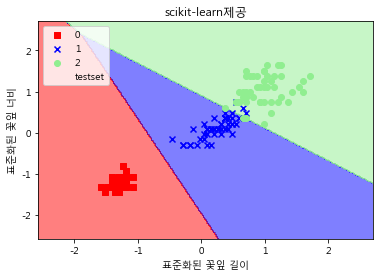

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from matplotlib import font_manager, rc
%matplotlib inline
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)  #그래프에서 한글깨짐 방지용

matplotlib.rcParams['axes.unicode_minus']= False


def plot_decision_region(X, y, classifier, test_idx=None, resolution=0.02, title=''):
    markers = ('s', 'x', 'o', '^', 'v')  # 점표시 모양 5개 정의
    colors = ('r', 'b', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #print('cmap : ', cmap.colors[0], cmap.colors[1], cmap.colors[2])

    # decision surface 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                             np.arange(x2_min, x2_max, resolution))

    # xx, yy를 ravel()를 이용해 1차원 배열로 만든 후 전치행렬로 변환하여 퍼셉트론 분류기의 
    # predict()의 안자로 입력하여 계산된 예측값을 Z로 둔다.
    Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape) #Z를 reshape()을 이용해 원래 배열 모양으로 복원한다.

    # X를 xx, yy가 축인 그래프상에 cmap을 이용해 등고선을 그림
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


    X_test = X[test_idx, :]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], c=cmap(idx), 
                    marker=markers[idx], label=cl)

    if test_idx:
        X_test = X[test_idx, :]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', linewidth=1, 
                    marker='o', s=80, label='testset')
    
    plt.xlabel('표준화된 꽃잎 길이')
    plt.ylabel('표준화된 꽃잎 너비')
    plt.legend(loc=2)
    plt.title(title)
    plt.show()

x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_region(X=x_combined_std, y=y_combined, classifier=ml, 
                    test_idx=range(105, 150), title='scikit-learn제공') 

In [6]:
import numpy as np
new_data = np.array([[5.1, 2.2], [2., 1.], [4.4, 0.2]])
print(new_data)
new_test_std = sc.transform(new_data)
print(new_test_std)
new_pred = ml.predict(new_test_std)
print(new_pred)

[[5.1 2.2]
 [2.  1. ]
 [4.4 0.2]]
[[ 0.70793846  1.25155848]
 [-1.01815868 -0.29145882]
 [ 0.31817459 -1.32013702]]
[2 0 1]
